# Tasks 3: Exploratory Data Analysis (EDA)
###Description:
* Understand trends and distributions in
the data.
* Generate summary statistics (mean,
median, mode).
* Create visualizations for numerical
columns (histograms, box plots).
* Analyze churn rates (e.g., churn vs. nonchurn proportions).

# Importing libraries

In [138]:
#------------------------------------
#Importing essentinal Libraries
#------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#----------------------------------
# Set plotting style
#----------------------------------

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

STEP : 01 Load Dataset

In [139]:
# === LOADING CLEANED DATASET ===

customer = pd.read_feather('Cleaned_Telco_Customer_Churn.feather')

print("="*60)
print("TELCO CUSTOMER CHURN - EXPLORATORY DATA ANALYSIS")
print("="*60)
print(f"Dataset Shape: {customer.shape[0]} rows × {customer.shape[1]} columns")
print("="*60)

TELCO CUSTOMER CHURN - EXPLORATORY DATA ANALYSIS
Dataset Shape: 7043 rows × 21 columns


STEP 02 : Understand trends and distributions in the data.

In [140]:
print("\n " + "="*50)
print("TASK 1: DATA TRENDS AND DISTRIBUTIONS ANALYSIS")
print("="*50)

# ---- 2.1 Dataset Overview ----
print("\nDataset Overview:")
print("\n"+"="*50)
print(f"Number of Customers : {customer.shape[0]}")
print(f"Number of Features : {customer.shape[1]}")
print(f"Memory Usage: {customer.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# --- 2.2 Identify Numerical and Categorical Columns ---
Numerical_Columns = customer.select_dtypes(include=['int64', 'float64']).columns.to_list()
Categorical_Columns = customer.select_dtypes(include=['object','category','bool']).columns.to_list()

# --- 2.3 Data Quality Check ---

print("Data Qulity Overview")
print("\n"+"="*50)

missing_data = customer.isnull().sum()
for col in missing_data.index:
    if missing_data[col] > 0:
        print(f"{col}: {missing_data[col]}({missing_data[col]/len(customer)*100:.2f}%)")

if missing_data.sum() == 0:
    print("No missing values found - Dataset is complete!")

# --- 1.4 Distribution Overview ---
print("\nDISTRIBUTION PATTERNS:")
print("="*30)

# Check for skewness in numerical columns

for col in Numerical_Columns:
  skewness = stats.skew(customer[col].dropna())
  if abs(skewness) > 1:
    skew_type = "highly skewed" if skewness > 1 else "moderately skewed"
    direction = "right" if skewness > 0 else "left"
    print(f"{col}: {skew_type} to the {direction} (skew: {skewness:.2f})")
  else:
    print(f"{col}: approximately normal distribution (skew: {skewness:.2f})")


TASK 1: DATA TRENDS AND DISTRIBUTIONS ANALYSIS

Dataset Overview:

Number of Customers : 7043
Number of Features : 21
Memory Usage: 0.73 MB
Data Qulity Overview

No missing values found - Dataset is complete!

DISTRIBUTION PATTERNS:
tenure: approximately normal distribution (skew: 0.24)
monthlycharges: approximately normal distribution (skew: -0.22)
totalcharges: approximately normal distribution (skew: 0.96)


#STEP : 03 Generate Summary Statisics

In [141]:
# ===================================================================
# TASK 03: GENERATE SUMMARY STATISTICS
# ===================================================================

print("\n" + "="*50)
print("TASK 2: COMPREHENSIVE SUMMARY STATISTICS")
print("="*50)

# --- 2.1 Numerical Variables Summary Statistics ---
print("\n NUMERICAL VARIABLES SUMMARY:")

for col in Numerical_Columns:
  print(f"\n{col.upper()}:")
  print("-" * 40)

  data = customer[col].dropna()

  # Central Tendency
  mean_val = data.mean()
  median_val = data.median()
  mode_val  = data.mode()

  #Range
  min_val = data.min()
  max_val = data.max()
  range_val = max_val - min_val

  #Spread
  std_val = data.std()
  var_val = data.var()

  #Quartiles
  Q1_var = data.quantile(0.25)
  Q3_var = data.quantile(0.75)
  iqr_var = Q3_var - Q1_var

  # Display statistics
  print(f"  Central Tendency:")
  print(f"    Mean: {mean_val:.2f}")
  print(f"    Median: {median_val:.2f}")

  print(f"  \nSpread:")
  print(f"    Standard Deviation: {std_val:.2f}")
  print(f"    Variance: {var_val:.2f}")
  print(f"    IQR: {iqr_var:.2f}")

  print(f"  \nRange:")
  print(f"    Min: {min_val:.2f}")
  print(f"    Max: {max_val:.2f}")
  print(f"    Range: {range_val:.2f}")

  print(f"  \nQuartiles:")
  print(f"    25th Percentile (Q1): {Q1_var:.2f}")
  print(f"    75th Percentile (Q3): {Q3_var:.2f}")

  # Outlier detection
  outlier_threshold_low = Q1_var - 1.5 * iqr_var
  outlier_threshold_high = Q3_var + 1.5 * iqr_var
  outliers = data[(data < outlier_threshold_low) | (data > outlier_threshold_high)]
  print(f"  \nPotential Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
print("=" * 70)

# --- 2.2 Categorical Variables Summary Statistics ---

print("\n\nCATEGORICAL VARIABLES SUMMARY:")
print("=" * 70)

for col in Categorical_Columns:


  print(f"\n{col.upper()}")
  print("-"*30)

  #Skipping cutomerid column
  if col == 'customerid':
    print("  Skipping frequency details for customerid (unique identifier).")
    continue

  # Value counts
  value_counts = customer[col].value_counts()
  percentage = customer[col].value_counts(normalize=True) * 100

  # Mode (most frequent value)
  cate_mode_val = customer[col].mode().iloc[0] if len(customer[col].mode()) > 0 else "No-Mode"
  cate_mode_freq = customer[col].value_counts().get(cate_mode_val, 0)

  # Display statistics
  print(f"Total Category:{customer[col].nunique()}   - {customer[col].unique().tolist()}")
  print(f"Mode (Most frequent value) : {cate_mode_val} - {cate_mode_freq} Times occured ")
  print(f"  Distribution:")

  for cate,count in value_counts.items():
    print(f"    {cate}: {count} ({percentage[cate]:.2f}%)")

print("=" * 70)

  ## --- 2.3 Summary Statistics Table ---
print("\n\nNUMERICAL SUMMARY TABLE:")
print("=" * 70)
summary_stats = customer[Numerical_Columns].describe()
print(summary_stats.round(2))

print("=" * 70)



TASK 2: COMPREHENSIVE SUMMARY STATISTICS

 NUMERICAL VARIABLES SUMMARY:

TENURE:
----------------------------------------
  Central Tendency:
    Mean: 32.37
    Median: 29.00
  
Spread:
    Standard Deviation: 24.56
    Variance: 603.17
    IQR: 46.00
  
Range:
    Min: 0.00
    Max: 72.00
    Range: 72.00
  
Quartiles:
    25th Percentile (Q1): 9.00
    75th Percentile (Q3): 55.00
  
Potential Outliers: 0 (0.00%)

MONTHLYCHARGES:
----------------------------------------
  Central Tendency:
    Mean: 64.76
    Median: 70.35
  
Spread:
    Standard Deviation: 30.09
    Variance: 905.41
    IQR: 54.35
  
Range:
    Min: 18.25
    Max: 118.75
    Range: 100.50
  
Quartiles:
    25th Percentile (Q1): 35.50
    75th Percentile (Q3): 89.85
  
Potential Outliers: 0 (0.00%)

TOTALCHARGES:
----------------------------------------
  Central Tendency:
    Mean: 2279.73
    Median: 1394.55
  
Spread:
    Standard Deviation: 2266.79
    Variance: 5138357.17
    IQR: 3388.05
  
Range:
    Min: 0.0

#STEP 04 : CREATE VISUALIZATIONS

TASK 3: DATA VISUALIZATION


HISTOGRAMS FOR NUMERICAL COLUMNS:


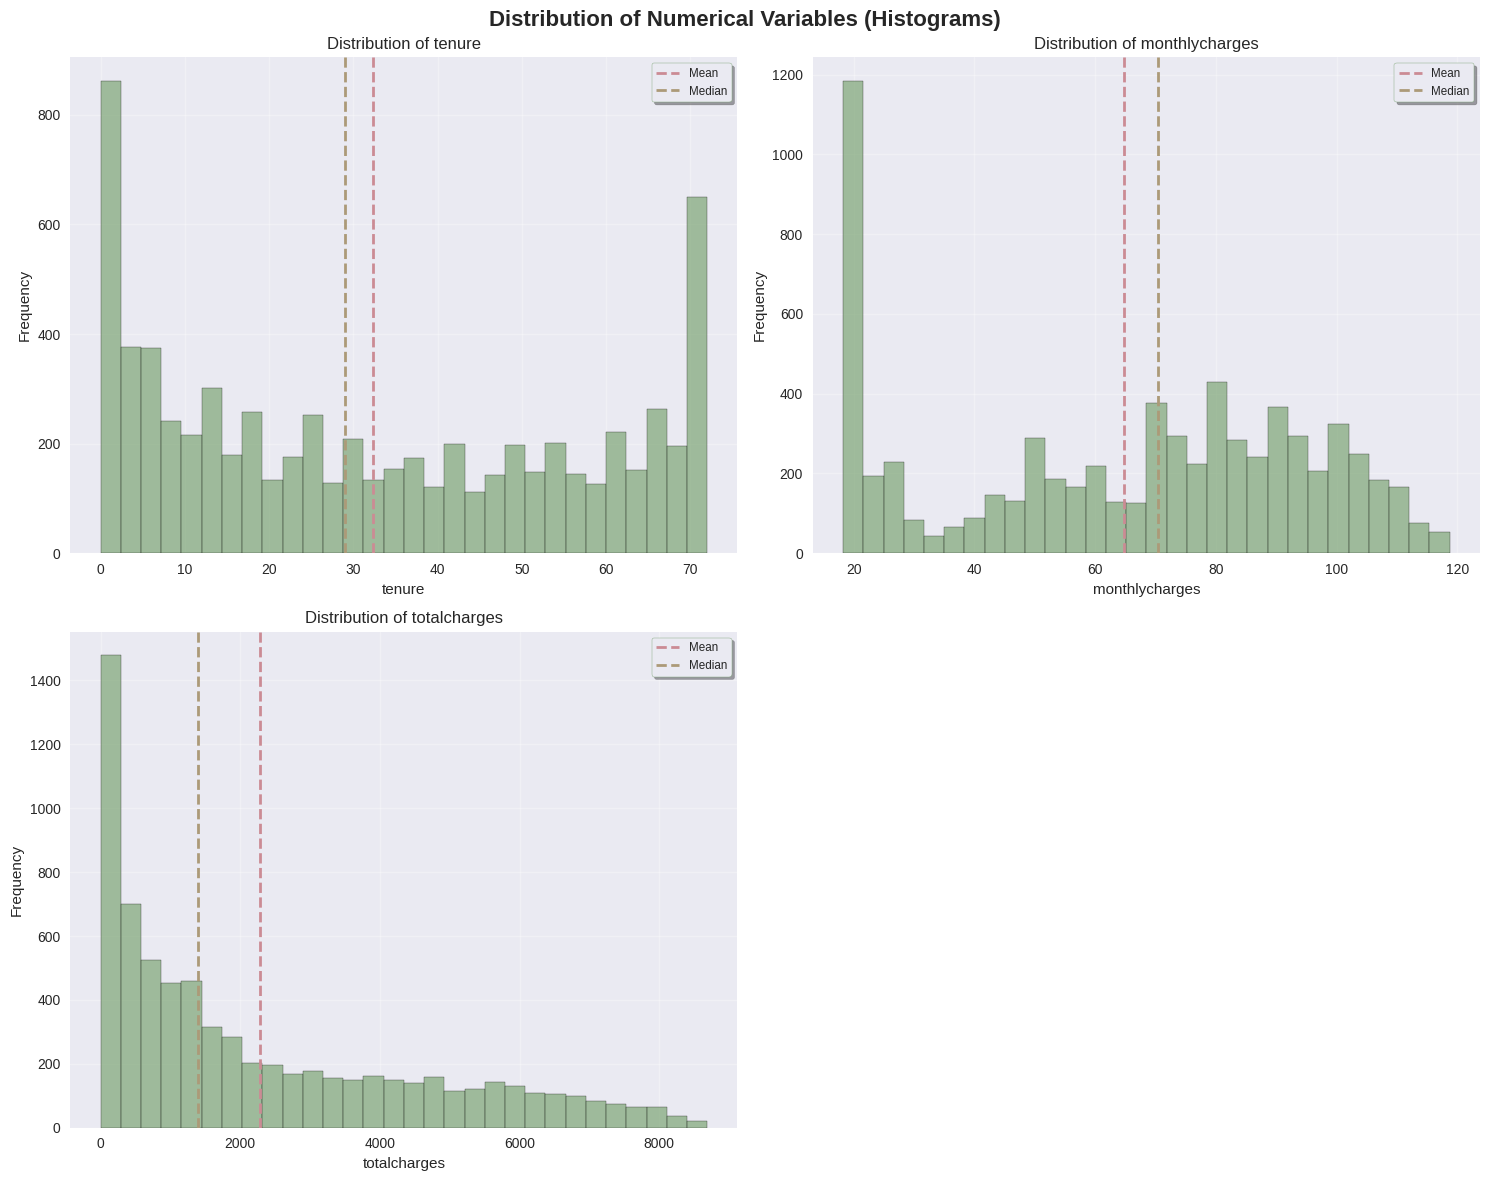



BOXPLOTS FOR NUMERICAL COLUMNS:


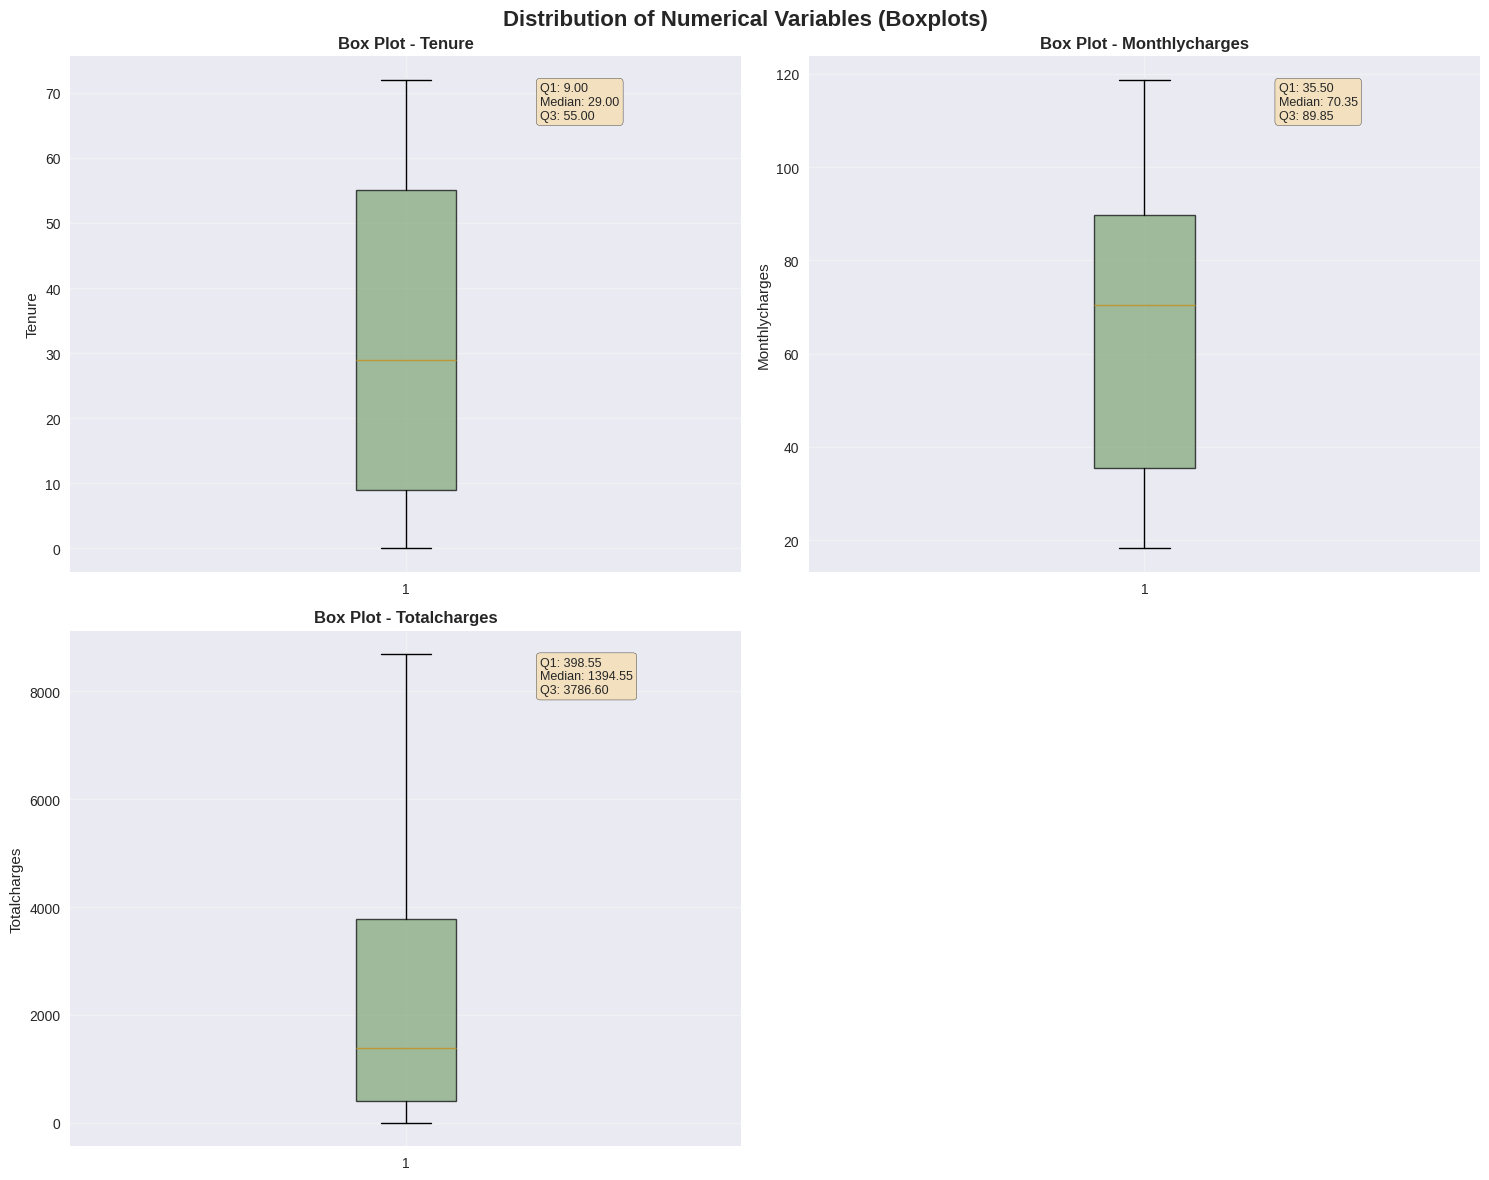


Creating Distribution Plots with Kernel Density Estimation


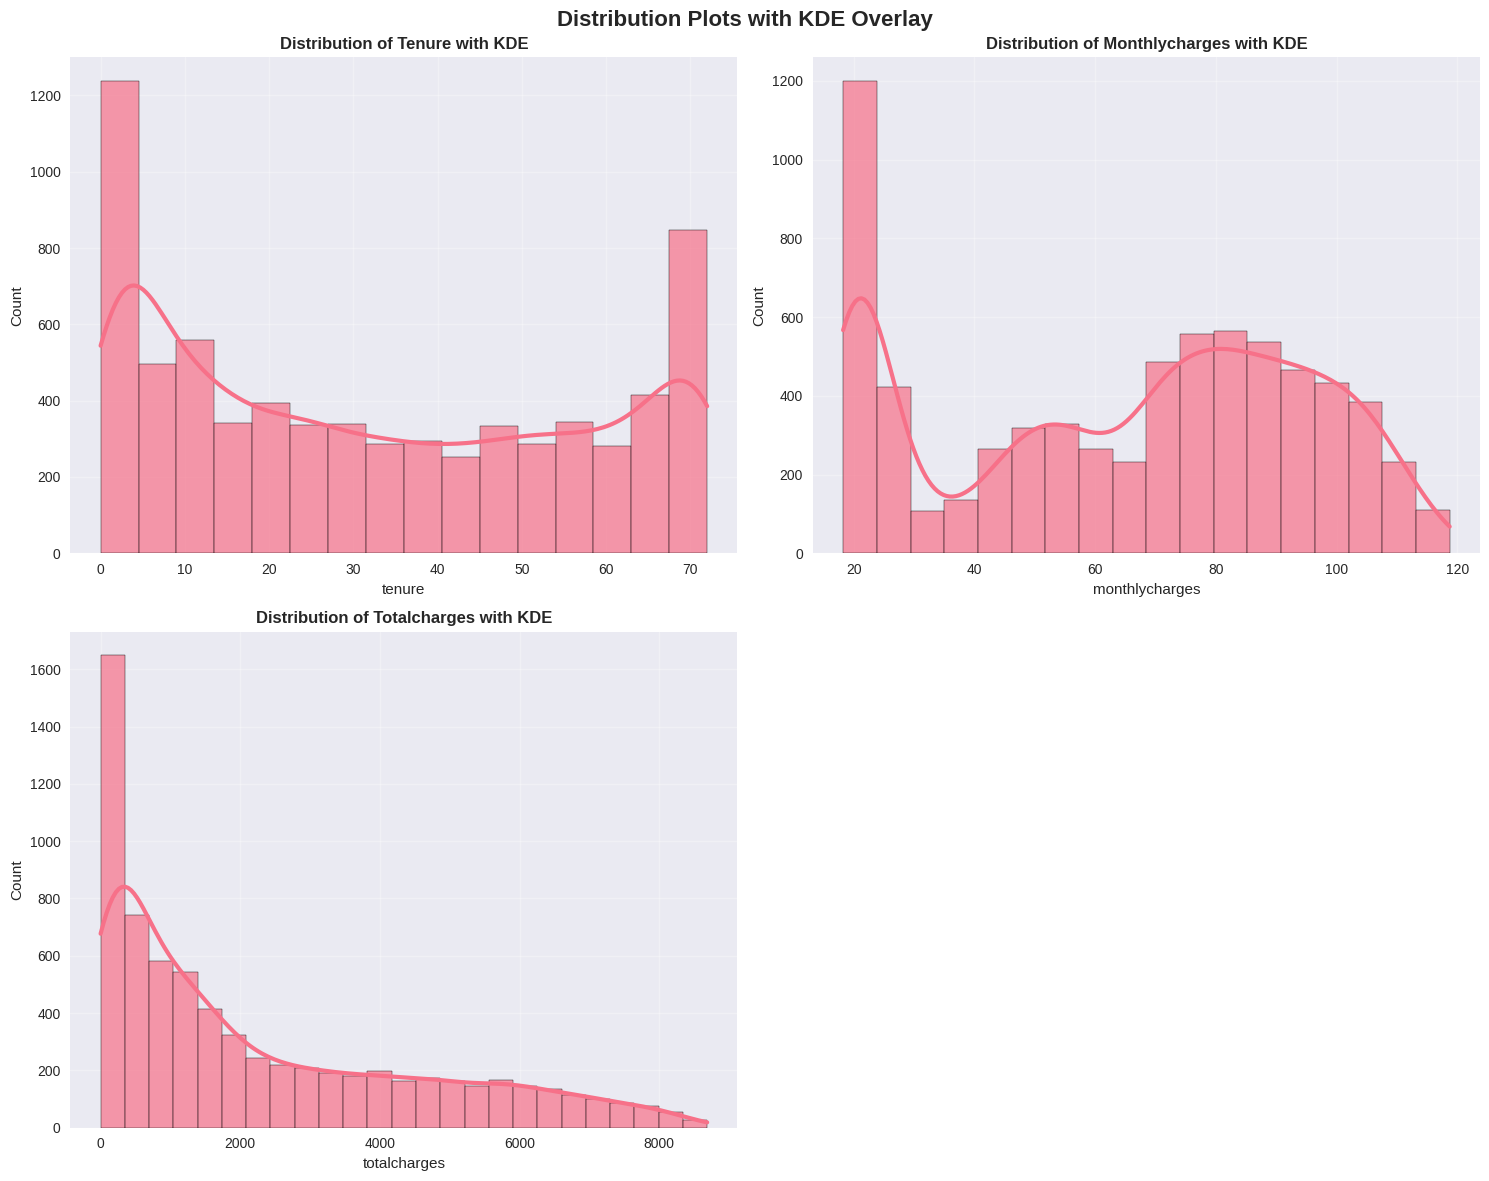

In [142]:
#======================================================================
#TASK 3: DATA VISUALIZATION
#======================================================================

print("=" * 70)
print("TASK 3: DATA VISUALIZATION")
print("=" * 70)

# ---- 4.1 Visualization for numerical columns ----

# ---- 4.1.1 Histograms for numerical columns ----

print("\n\nHISTOGRAMS FOR NUMERICAL COLUMNS:")
print("=" * 70)

#Define plotting area and style

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,12))
fig.suptitle('Distribution of Numerical Variables (Histograms)', fontsize=16, fontweight='bold')
color = sns.husl_palette(s=.4)

# Flatten axes for easy iteration
axes = axes.flatten()

for i,col in enumerate(Numerical_Columns):
  if i < len(axes):
    # Create Histogram
    axes[i].hist(customer[col], alpha=0.70 , bins=30,color=color[2],edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Add mean and meadian line
    mean_val = customer[col].mean()
    median_val = customer[col].median()
    axes[i].axvline(mean_val,color=color[0],linestyle='dashed',linewidth=2,label='Mean')
    axes[i].axvline(median_val,color=color[1],linestyle='dashed',linewidth=2,label='Median')
    axes[i].legend(shadow=True,frameon=True,fontsize='small',edgecolor=color[2])

    # Add grid for better readability
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot if any
if len(Numerical_Columns) < len(axes):
    for j in range(len(Numerical_Columns),len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ---- 4.1.2 Boxplots for numerical columns ----

print("\n\nBOXPLOTS FOR NUMERICAL COLUMNS:")
print("=" * 70)

#Define plotting area and style

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,12))
fig.suptitle('Distribution of Numerical Variables (Boxplots)', fontsize=16, fontweight='bold')
color = sns.husl_palette(s=.4)

# Flatten axes for easy iteration
axes = axes.flatten()

for i,col in enumerate(Numerical_Columns):
  if i < len(axes):
    # Create Boxplot
    box_plot = axes[i].boxplot(customer[col].dropna(),patch_artist=True)
    axes[i].set_title(f'Box Plot - {col.title()}', fontweight='bold')
    axes[i].set_ylabel(col.title())
    axes[i].grid(True, alpha=0.3)

    # Customize box plot
    for patch in box_plot['boxes']:
        patch.set_facecolor(color[2])
        patch.set_alpha(0.7)


    # Add statistical information

    Q1 = customer[col].quantile(0.25)
    Q3 = customer[col].quantile(0.75)
    median_val = customer[col].median()

    # Add text box with quartile information
    textstr = f'Q1: {Q1:.2f}\nMedian: {median_val:.2f}\nQ3: {Q3:.2f}'
    props = dict(boxstyle='round',facecolor='wheat', alpha=0.8)
    axes[i].text(0.7, 0.95, textstr, transform=axes[i].transAxes, fontsize=9,
                verticalalignment='top', bbox=props)


# Remove empty subplot if any
if len(Numerical_Columns) < len(axes):
    for j in range(len(Numerical_Columns),len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- 4.1.3 Distribution Plots with KDE ---
print("\nCreating Distribution Plots with Kernel Density Estimation")
print("="*70)

#Define area and style of plot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution Plots with KDE Overlay', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    if i < len(axes):
        # Create histogram with KDE
        sns.histplot(data=customer, x=col, kde=True, ax=axes[i], alpha=0.7,palette = color,line_kws={'linewidth':3})
        axes[i].set_title(f'Distribution of {col.title()} with KDE', fontweight='bold')
        axes[i].grid(True, alpha=0.3)

# Remove empty subplot if any
if len(Numerical_Columns) < len(axes):
    for j in range(len(Numerical_Columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("="*140)

# STEP : 05 Churn Analysis

TASK 4: CHURN ANALYSIS

OVERALL CHURN ANALYSIS:
----------------------------------------
Total Customers: 7,043

Churn Distribution:
  No: 5174 (73.46%)
  Yes: 1869 (26.54%)

Over All churn rate
  Churn Rate: 26.54%
  Retention Rate: 73.46%

Creating Churn Rate Visualizations


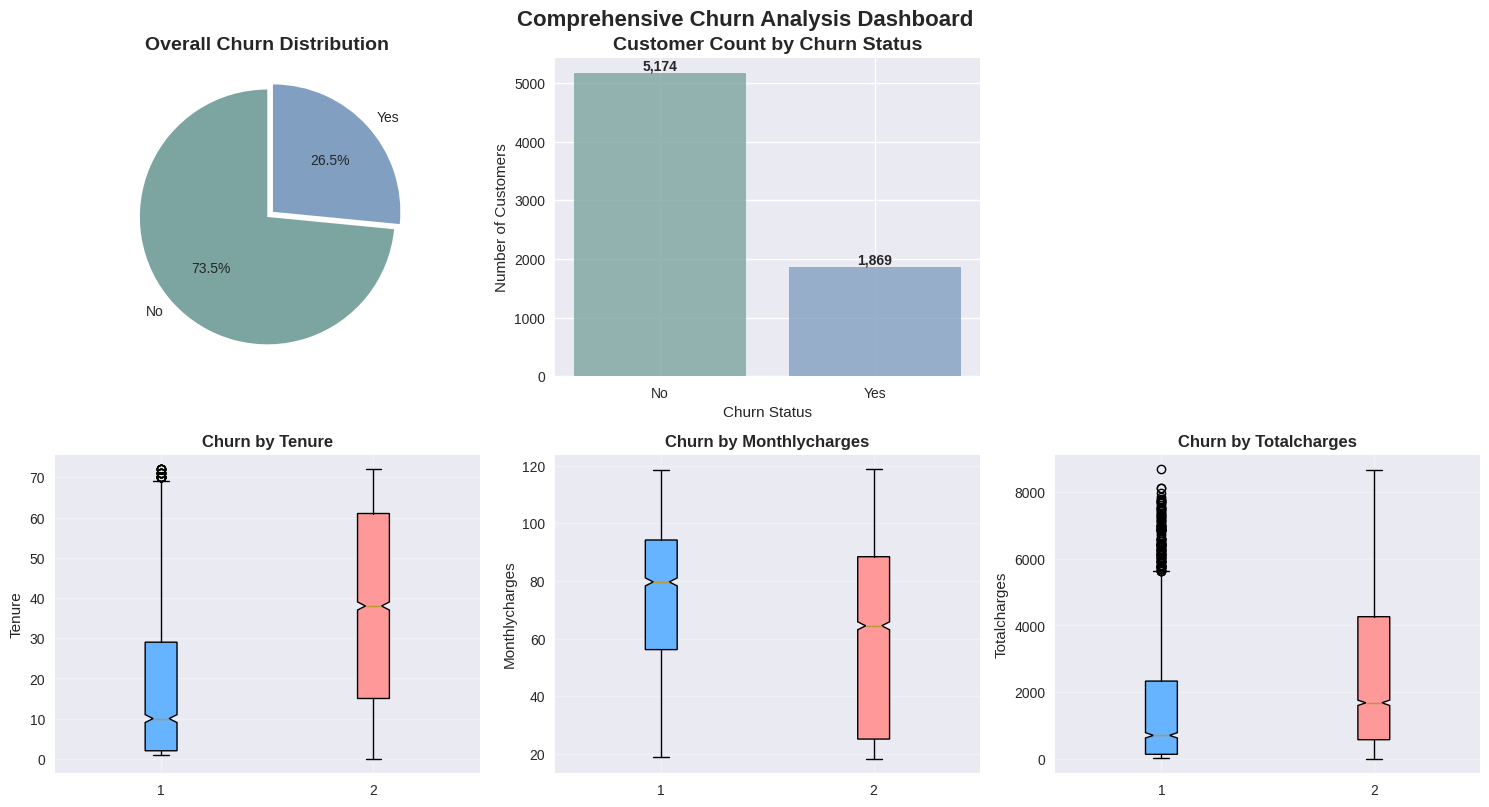


CHURN RATES BY CATEGORICAL VARIABLES:

Churn Analysis by Gender:
----------------------------------------
  Female: 939/3488 churned (26.92%)
  Male: 930/3555 churned (26.16%)

Churn Analysis by Seniorcitizen:
----------------------------------------
  True: 476/1142 churned (41.68%)
  False: 1393/5901 churned (23.61%)

Churn Analysis by Partner:
----------------------------------------
  No: 1200/3641 churned (32.96%)
  Yes: 669/3402 churned (19.66%)

Churn Analysis by Dependents:
----------------------------------------
  No: 1543/4933 churned (31.28%)
  Yes: 326/2110 churned (15.45%)

Churn Analysis by Phoneservice:
----------------------------------------
  Yes: 1699/6361 churned (26.71%)
  No: 170/682 churned (24.93%)

Churn Analysis by Multiplelines:
----------------------------------------
  Yes: 850/2971 churned (28.61%)
  No: 849/3390 churned (25.04%)
  No phone service: 170/682 churned (24.93%)

Churn Analysis by Internetservice:
----------------------------------------
  Fi

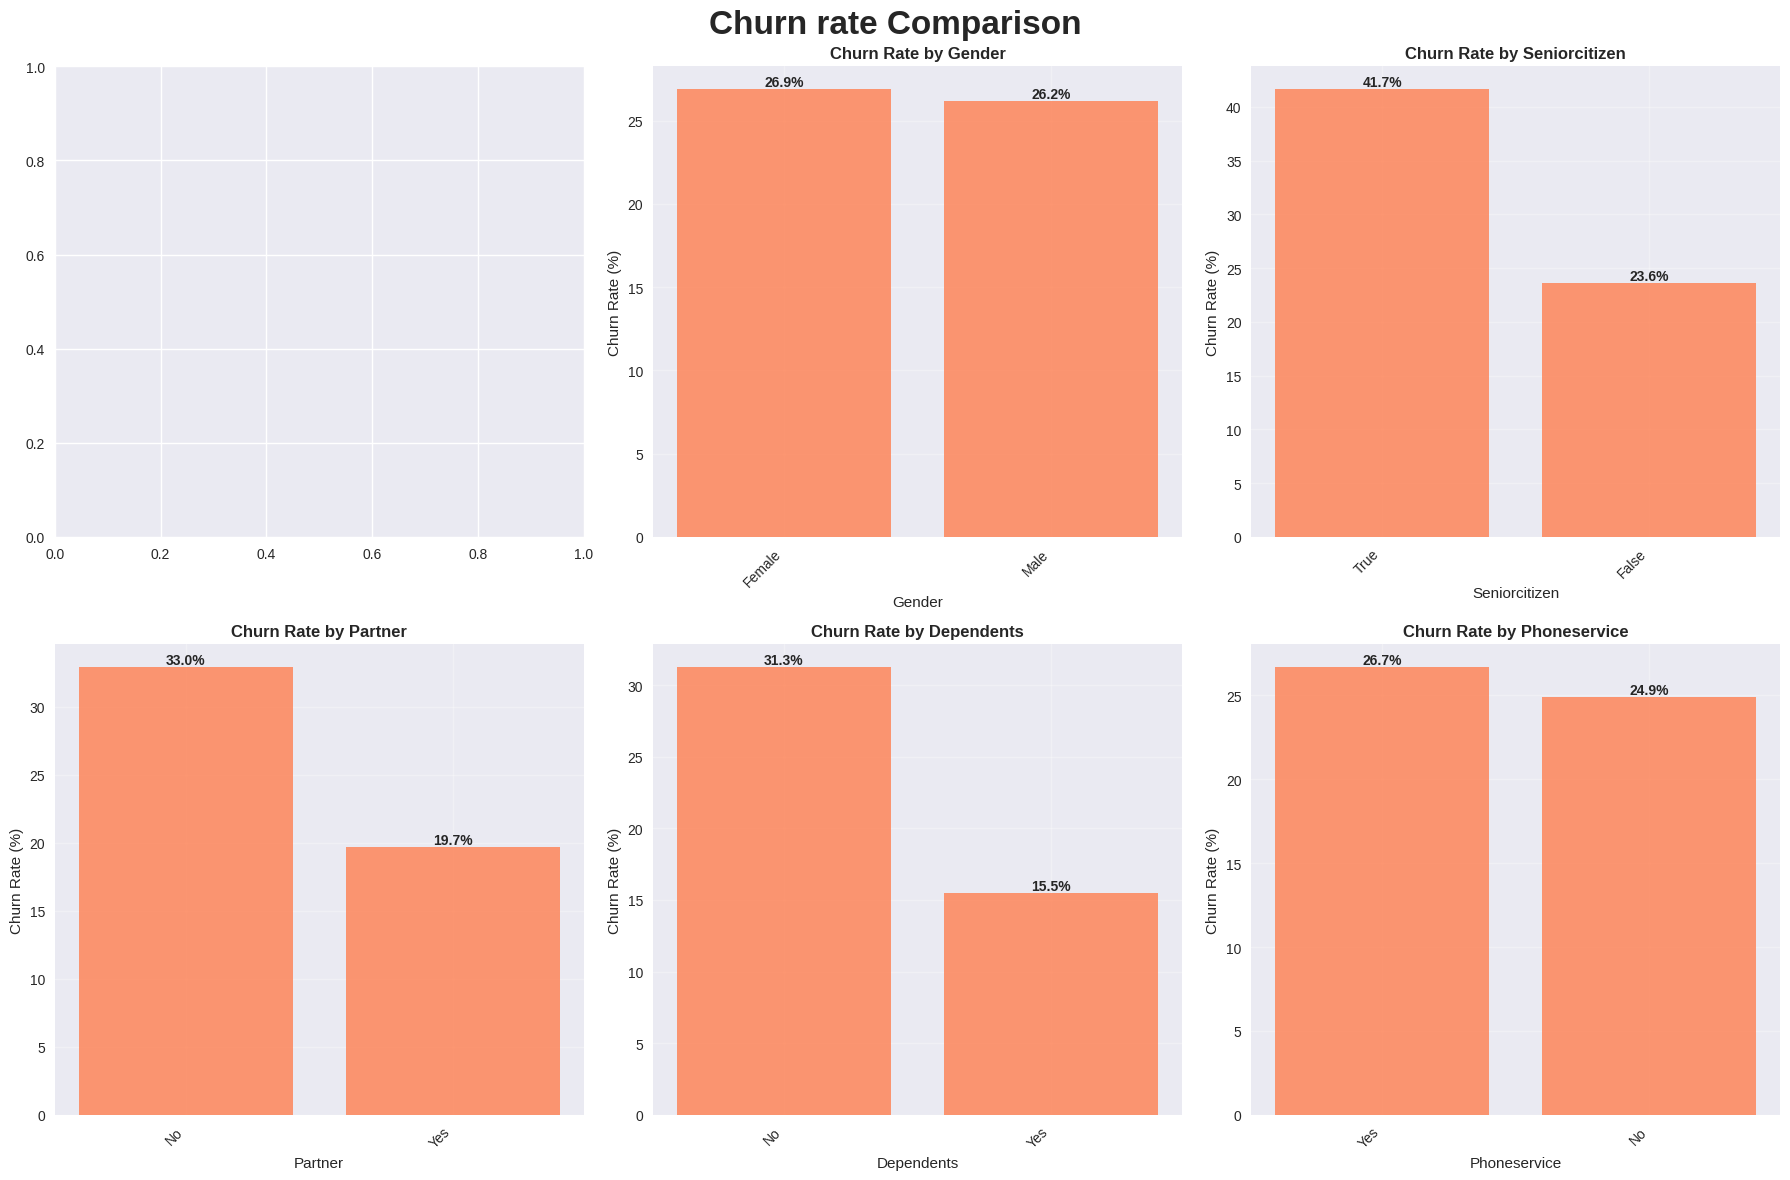

In [143]:
# ===================================================================
# TASK 4: ANALYZE CHURN RATES (CHURN VS NON-CHURN PROPORTIONS)
# ===================================================================

print("="*70)
print("TASK 4: CHURN ANALYSIS")
print("="*70)

# ---- 4.1 Overall Churn Analysis ----

print("\nOVERALL CHURN ANALYSIS:")
print("-" * 40)

# Basic churn statistics
churn_counts = customer['churn'].value_counts()
churn_percentage = customer['churn'].value_counts(normalize=True) * 100

print(f"Total Customers: {len(customer):,}")
print(f"\nChurn Distribution:")

for status,count in churn_counts.items():
  print(f"  {status}: {count} ({churn_percentage[status]:.2f}%)")

# Over All Churn Rate

churn_rate = churn_counts.get('Yes',0) / len(customer) * 100
retention_rate = 100 - churn_rate

print("\nOver All churn rate")
print(f"  Churn Rate: {churn_rate:.2f}%")
print(f"  Retention Rate: {retention_rate:.2f}%")

# --- 4.2 Churn Rate Visualization ---
print("\n"+"="*40)
print("Creating Churn Rate Visualizations")
print("="*40)

# Create a comprehensive churn analysis dashboard
fig1 = plt.figure(figsize=(15,12))

# ---- 4.2.1 Overall distribution of Churn Rate(pie-Chart) ----
ax1 = plt.subplot(3,3,1) # creating axes for plot

# Exploding churned value
labels = churn_counts.index.tolist()
explode = [.06 if label == 'Yes' else 0 for label in labels]

#pie chart
wedges , texts , autotexts = ax1.pie(churn_counts,labels=labels,autopct='%1.1f%%',startangle=90,explode=explode,colors=color[3:5])
ax1.set_title('Overall Churn Distribution', fontweight='bold', fontsize=14)

# ---- 4.2.2 Churn Count Bar Chart ----
ax2 = plt.subplot(3,3,2) # creating axes for plot

bars = ax2.bar(churn_counts.index, churn_counts.values, color=color[3:5], alpha=0.8)
ax2.set_title('Customer Count by Churn Status', fontweight='bold', fontsize=14)
ax2.set_ylabel('Number of Customers')
ax2.set_xlabel('Churn Status')

# Add value labels on bars
for bar in bars:
  height = bar.get_height()
  ax2.text(bar.get_x()+bar.get_width()/2 , height,f'{int(height):,}',fontweight='bold',ha='center',va='bottom')

# 4.2.3 Churn by Numerical Variables
for i , col in enumerate(Numerical_Columns,3):
  ax = plt.subplot(3,3,i+1)

  # Create box plots comparing churned vs retained customers
  churn_yes = customer[customer['churn'] == 'Yes'].dropna(subset=[col])
  churn_no = customer[customer['churn'] == 'No'].dropna(subset=[col])

  box_data = [churn_yes[col], churn_no[col]]
  box_labels = ['Yes' , 'No']

  bp =  ax.boxplot(box_data,box_labels,patch_artist=True)

  # Color the boxes
  bp['boxes'][0].set_facecolor('#66b3ff')  # Retained - blue
  bp['boxes'][1].set_facecolor('#ff9999')  # Churned - red

  ax.set_title(f'Churn by {col.title()}', fontweight='bold')
  ax.set_ylabel(col.title())
  ax.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Churn Analysis Dashboard', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## --- 4.3 Churn Analysis by Categorical Variables ---
print("\n"+"="*60)
print("CHURN RATES BY CATEGORICAL VARIABLES:")
print("=" * 60)

# Calculate churn rates for each categorical variable
churn_analysis_results = {}

for col in Categorical_Columns:
  if (col != 'churn' and col != 'customerid'): # Skipping targeting column
    print(f'\nChurn Analysis by {col.title()}:')
    print("-"*40)

    # Calculate churn rate by category
    churn_by_category = customer.groupby(col)['churn'].agg(total_customers='count',
    churned_customers=lambda x: (x == 'Yes').sum()).reset_index()
    churn_by_category['churn_rate'] = (churn_by_category['churned_customers'] / churn_by_category['total_customers']) * 100
    churn_by_category['retention_rate'] = 100 - churn_by_category['churn_rate']


    # Rename columns for clarity
    churn_by_category.columns = [col, 'total_customers', 'churned_customers', 'churn_rate', 'retention_rate']

    # Sort by churn rate
    churn_by_category = churn_by_category.sort_values('churn_rate', ascending=False)

    # Store results
    churn_analysis_results[col] = churn_by_category

    # Display results
    for _, row in churn_by_category.iterrows():
        print(f"  {row[col]}: {row['churned_customers']}/{row['total_customers']} churned ({row['churn_rate']:.2f}%)")


# --- 4.4 Create Churn Rate Heatmap for Categorical Variables ---
print("\nCreating Churn Rate Comparison Charts...")

# Select key categorical variables for visualization (limit to avoid overcrowding)
key_categorical = [col for col in Categorical_Columns if col != 'churn'][:6]

fig2, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Churn Rates by Categorical Variables', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(key_categorical):

   if col != 'customerid':
    if i < len(axes):
        # Get churn analysis for this variable
        analysis_data = churn_analysis_results[col]

        # Create bar plot
        bars = axes[i].bar(range(len(analysis_data)), analysis_data['churn_rate'],
                          color='coral', alpha=0.8)

        # Customize the plot
        axes[i].set_title(f'Churn Rate by {col.title()}', fontweight='bold')
        axes[i].set_ylabel('Churn Rate (%)')
        axes[i].set_xlabel(col.title())
        axes[i].set_xticks(range(len(analysis_data)))
        axes[i].set_xticklabels(analysis_data[col], rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)

        # Add value labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Remove empty subplots
for j in range(len(key_categorical), len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Churn rate Comparison",fontsize=24,fontweight='bold')
plt.tight_layout()
plt.show()

#STEP : 06 Saving Figures

In [145]:
fig1.savefig('churn_analysis_overview.png')
fig2.savefig('churn_rate_comparison.png')